In [22]:
%reset -f
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import json
from CTR import *
from CTR.PIticks import PIticks

In [23]:
XRD = Xray(wavelength=Xray.CuKa1)
Q = XRD.Q(1,0,0)
E = XRD.Energy
TTHETA = XRD.TTHETA
Qx = Q[:,0]

In [24]:
Sr = Atom(32)
Ti = Atom(22)
O  = Atom(8)
Ru = Atom(44)
Nd = Atom(60)
Ni = Atom(28)
Ga = Atom(31)
Y  = Atom(39)
Al = Atom(13)
W  = Atom(74)
#
sto = Perovskite(
    abc = 3.905 * vec(1, 1, 1),
    ABO = (Sr, Ti, O) # Atoms
)
sro = Perovskite(
    abc = Molecule.pseudocubic(5.567, 5.5304, 7.8446),
    ABO = (Sr, Ru, O)
)
nno = Perovskite(
    abc = Molecule.pseudocubic(5.387, 5.383, 7.610),
    ABO = (Nd, Ni, O)
)
ngo = Perovskite(
    abc = Molecule.pseudocubic(5.428, 5.498, 7.708),
    ABO = (Nd, Ga, O)
)
yap = Perovskite(
    abc = Molecule.pseudocubic(5.18, 5.32, 7.37),
    ABO = (Y, Al, O)
)
wo3 = Molecule(
    abc = vec(7.69, 7.69, 7.76)/2,
    structure = [
            W(0.5, 0.5, 0.5),
            *[O(*rj) for rj in (np.ones([3, 3]) - np.eye(3))/2]
        ]
)
#
STO_Bulk = Film(sto, (inf,1,1))
NNO_Bulk = Film(nno, (inf,1,1))
NGO_Bulk = Film(ngo, (inf,1,1))
WO3_Bulk = Film(wo3, (inf,1,1))
YAP_Bulk = Film(yap, (inf,1,1))

STO = Film(*sto(10,1,1))
NNO = Film(*nno(10,1,1))
NGO = Film(*ngo(10,1,1))
YAP = Film(yap, (10,1,1))
WO3 = Film(wo3, (10,1,1))
#
STO_NNO = Film(sto/nno(1,0,0), (10,1,1))
NNO_STO = Film(nno/sto(1,0,0), (10,1,1))
STO_NGO = Film(sto/ngo(1,0,0), (10,1,1))
NGO_STO = Film(ngo/sto(1,0,0), (10,1,1))
SRO_STO = Film(sro/sto(1,0,0), (10,1,1))
WO3_YAP = Film(wo3/yap(1,0,0), (10,1,1))

#
NNOSTO = Sample(NNO_STO, STO_Bulk, nref=(1,0,0))
STONNO = Sample(STO_NNO, NNO_Bulk, nref=(1,0,0))
NGOSTO = Sample(NGO_STO, STO_Bulk, nref=(1,0,0))
STONGO = Sample(STO_NGO, NGO_Bulk, nref=(1,0,0))
SROSTO = Sample(SRO_STO, STO_Bulk, nref=(1,0,0))
WO3YAP = WO3_YAP/YAP_Bulk(1,0,0)
# WO3YAP = Sample(WO3_YAP, YAP_Bulk, nref=(1,0,0))
NNONGOSTO = NNO/NGO/STO_Bulk(1,0,0)
# NNONGOSTO = Sample(NNO,NGO,STO_Bulk, nref=(1,0,0))

In [26]:
# Ni Friends
ni_sc = SC(
    abc = 3.48 * vec(1, 1, 1),
    X   = Ni
)
ni_sc_UP = SC(
    abc = 3.82 * vec(1, 1, 1),
    X   = Ni
)
ni_fcc = FCC(
    abc = 3.48 * vec(1, 1, 1),
    X   = Ni
)
ni_bcc = BCC(
    abc = 3.48 * vec(1, 1, 1),
    AB   = (Ni, Ni)
)
ni_pvs = Perovskite(
    abc = 3.48 * vec(1, 1, 1),
    ABO   = (Ni, Ni, Ni)
)
H_ni = ni_sc.Q2HKL(Q)[:, 0]
NI_SC = Film(ni_sc, (inf, 1, 1))
NI_SC_UP = Film(ni_sc_UP, (2, 1, 1))
NI_FCC = Film(ni_fcc, (inf, 1, 1))
NI_BCC = Film(ni_bcc, (inf, 1, 1))
NI_PVS = Film(ni_pvs, (inf, 1, 1))

---

## basic

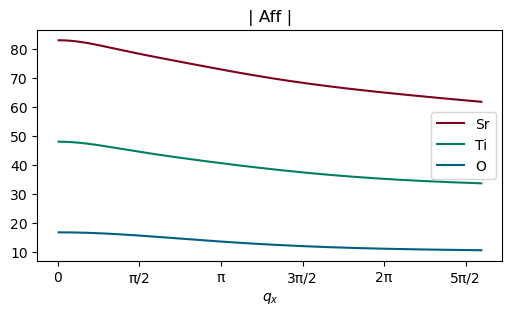

In [27]:
plt.figure(figsize=(6,3))
plt.title('| Aff |')
plt.plot(Qx, np.abs(Sr.aff(Q, E)), color='#800020', label='Sr')
plt.plot(Qx, np.abs(Ti.aff(Q, E)), color='#008060', label='Ti')
plt.plot(Qx, np.abs(O.aff(Q, E)), color='#006080', label='O')
# plt.plot(TTHETA, np.abs(W.aff(Q, E)), color='#006080', label='Y')
plt.xlabel("$q_x$")
plt.xticks(*PIticks(0, 2.5, 0.5))
# plt.xlabel("2θ (Deg.)")
plt.legend()

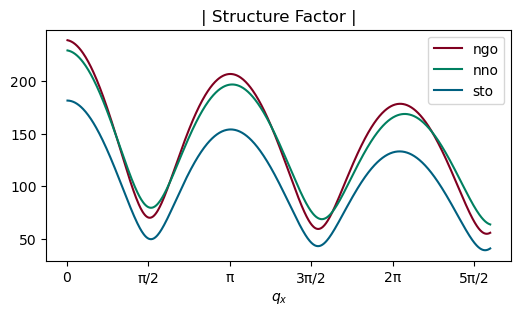

In [28]:
plt.figure(figsize=(6,3))
plt.title('| Structure Factor |')
plt.plot(Qx, np.abs(ngo.SF(Q, E)), color='#800020', label='ngo')
plt.plot(Qx, np.abs(nno.SF(Q, E)), color='#008060', label='nno')
plt.plot(Qx, np.abs(sto.SF(Q, E)), color='#006080', label='sto')
plt.xlabel("$q_x$")
plt.xticks(*PIticks(0, 2.5, 0.5))

# plt.xlabel("2θ (Deg.)")
plt.legend()

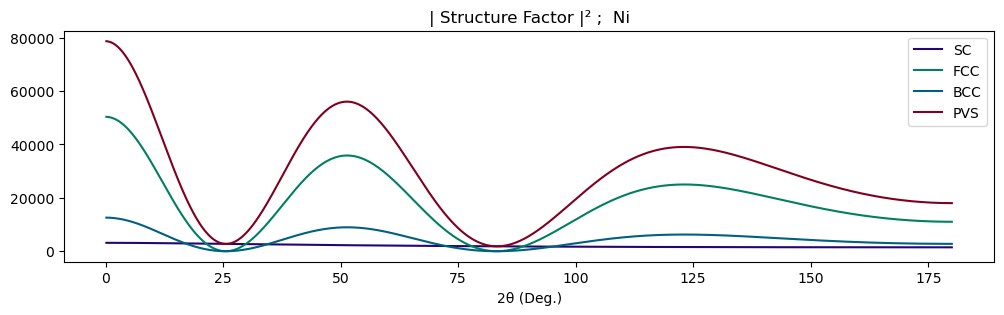

In [29]:
plt.figure(figsize=(12,3))
plt.plot(TTHETA, np.abs(ni_sc.SF(Q))**2, label='SC', color='#250670')
plt.plot(TTHETA, np.abs(ni_fcc.SF(Q))**2, label='FCC', color='#008060')
plt.plot(TTHETA, np.abs(ni_bcc.SF(Q))**2, label='BCC', color='#006080')
plt.plot(TTHETA, np.abs(ni_pvs.SF(Q))**2, label='PVS', color='#800020')
plt.title("| Structure Factor |² ;  Ni")
plt.xlabel('2θ (Deg.)')
plt.legend()

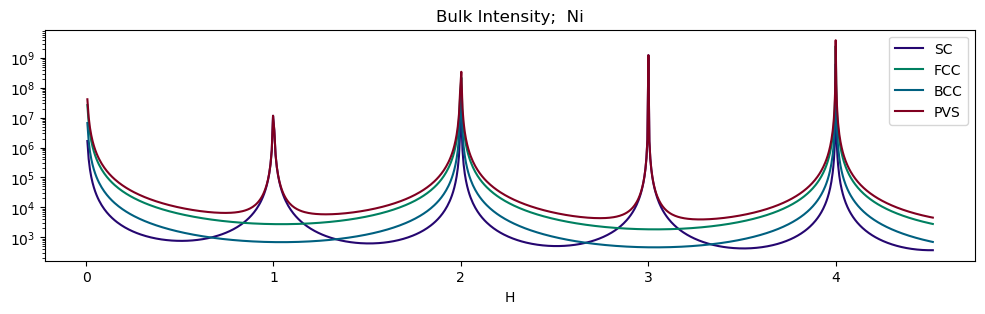

In [30]:
plt.figure(figsize=(12,3))
plt.semilogy(H_ni, NI_SC.I(Q), label='SC', color='#250670')
plt.semilogy(H_ni, NI_FCC.I(Q), label='FCC', color='#008060')
plt.semilogy(H_ni, NI_BCC.I(Q), label='BCC', color='#006080')
plt.semilogy(H_ni, NI_PVS.I(Q), label='PVS', color='#800020')
plt.title("Bulk Intensity;  Ni")
plt.xlabel('H')
plt.legend()

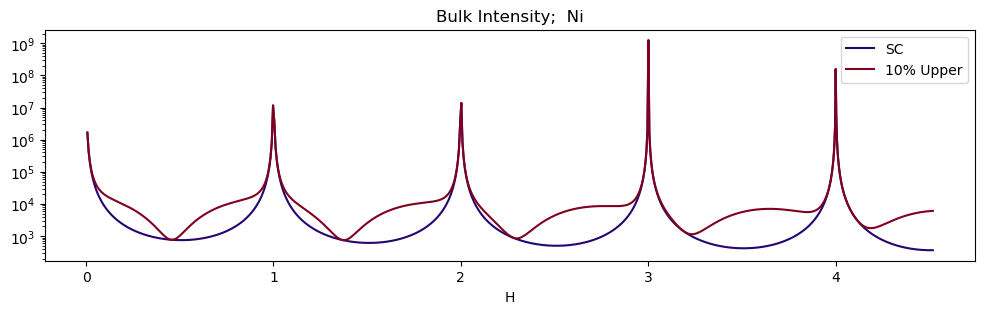

In [31]:
plt.figure(figsize=(12,3))
plt.semilogy(H_ni, NI_SC.I(Q), label='SC', color='#250670')
plt.semilogy(H_ni, (NI_SC_UP/NI_SC(1,0,0)).I(Q), label='10% Upper', color='#800020')
plt.title("Bulk Intensity;  Ni")
plt.xlabel('H')
plt.legend()

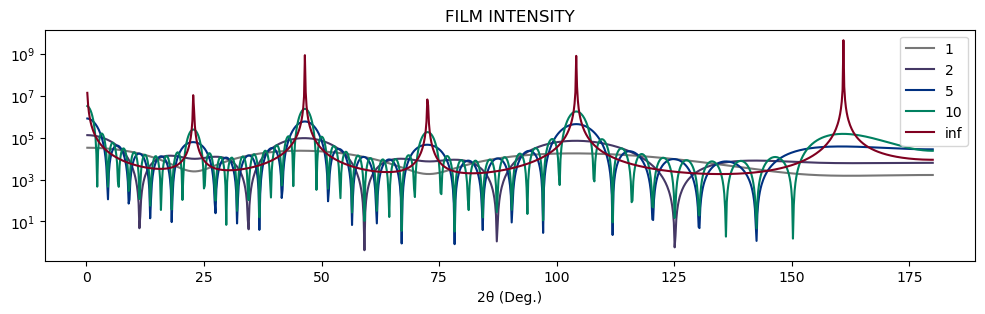

In [32]:
plt.figure(figsize=(12,3))
STO_gen = lambda Nc: Film(sto, (Nc,1,1))
plt.title('FILM INTENSITY')
plt.semilogy(TTHETA, STO_gen(1).I(Q), color='#777777', label="1")
plt.semilogy(TTHETA, STO_gen(2).I(Q), color='#453865', label="2")
plt.semilogy(TTHETA, STO_gen(5).I(Q), color='#003080', label="5")
plt.semilogy(TTHETA, STO_gen(10).I(Q), color='#008060', label="10")
plt.semilogy(TTHETA, STO_gen(inf).I(Q), color='#800020', label="inf")
plt.xlabel("2θ (Deg.)")
plt.legend()

---
## New

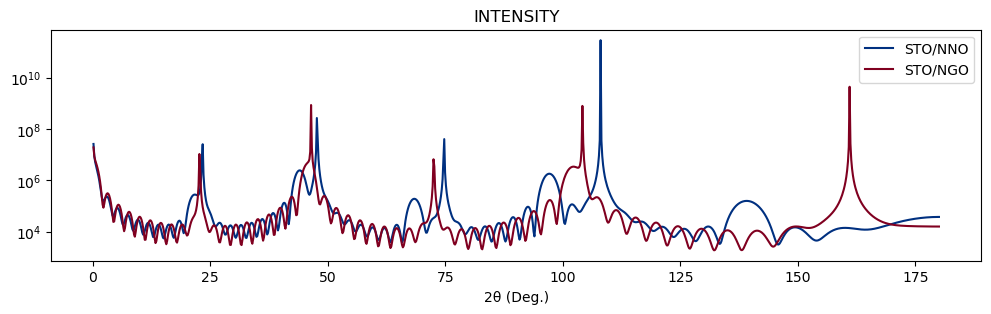

In [33]:
plt.figure(figsize=(12,3))
plt.title('INTENSITY')
# plt.semilogy(TTHETA, NNOSTO.I(Q), color='#453865', label="NNO/STO")
plt.semilogy(TTHETA, STONNO.I(Q), color='#003080', label="STO/NNO")
# plt.semilogy(TTHETA, NGOSTO.I(Q), color='#008060', label="NGO/STO")
plt.semilogy(TTHETA, SROSTO.I(Q), color='#800020', label="STO/NGO")
plt.xlabel("2θ (Deg.)")
plt.legend()

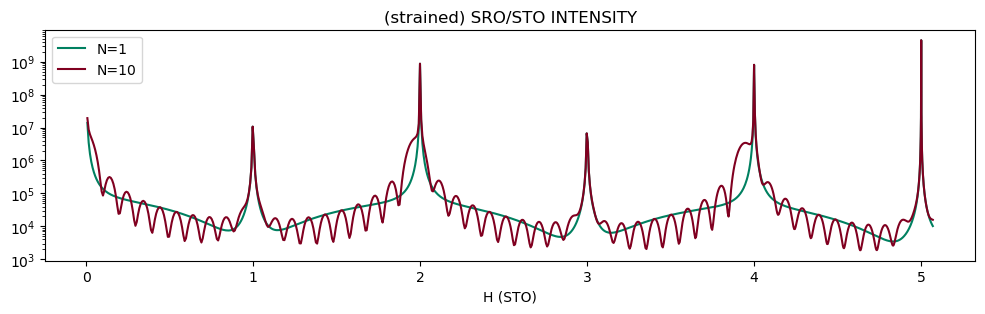

In [34]:
H = XRD.HKL(sto)[:,0]
GEN_SRO_sto_STO = lambda N: Sample(Film(sro/sto(1,0,0), (N,1,1)), STO_Bulk, nref=(1,0,0))
plt.figure(figsize=(12,3))
plt.title('(strained) SRO/STO INTENSITY')
plt.semilogy(H, GEN_SRO_sto_STO(1).I(Q), color='#008060', label="N=1")
# plt.semilogy(H, GEN_SRO_sto_STO(2).I(Q), color='#008060', label="N=2")
# plt.semilogy(H, GEN_SRO_sto_STO(3).I(Q), color='#006080', label="N=3")
# plt.semilogy(H, GEN_SRO_sto_STO(5).I(Q), color='#250670', label="N=5")
plt.semilogy(H, GEN_SRO_sto_STO(10).I(Q), color='#800020', label="N=10")
plt.xlabel("H (STO)")
plt.legend()

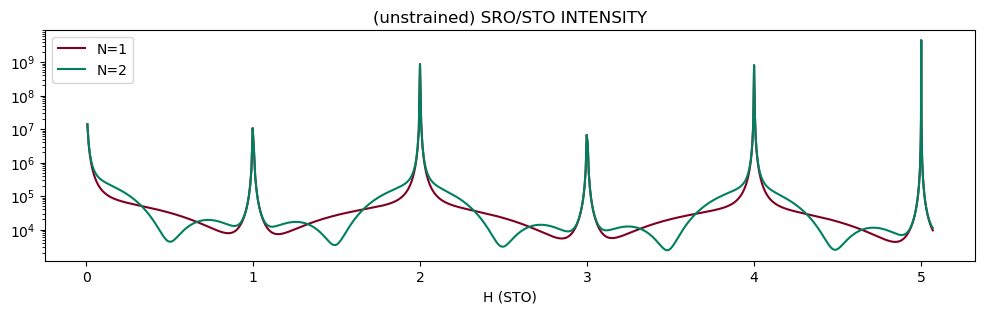

In [35]:
L = XRD.HKL(sto)[:,0]
GEN_SROSTO = lambda N: Sample(Film(sro, (N,1,1)), STO_Bulk, nref=(1,0,0))
plt.figure(figsize=(12,3))
plt.title('(unstrained) SRO/STO INTENSITY')
plt.semilogy(L, GEN_SROSTO(1).I(Q), color='#800020', label="N=1")
plt.semilogy(L, GEN_SROSTO(2).I(Q), color='#008060', label="N=2")
# plt.semilogy(L, GEN_SROSTO(3).I(Q), color='#006080', label="N=3")
# plt.semilogy(L, GEN_SROSTO(5).I(Q), color='#250670', label="N=5")
# plt.semilogy(L, GEN_SROSTO(10).I(Q), color='#250600', label="N=10")
plt.xlabel("H (STO)")
plt.legend()

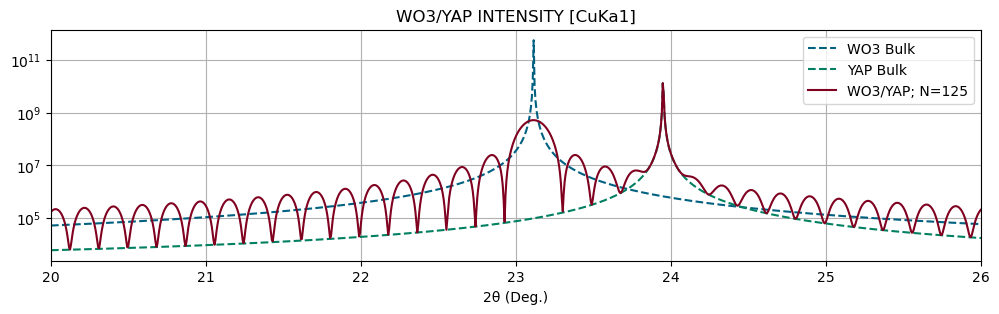

In [36]:
XRD_KJ = Xray(wavelength = Xray.CuKa1, TTHETA=np.linspace(20, 26, 1024))
TTHETA = XRD_KJ.TTHETA

Q = XRD_KJ.Q(1,0,0)
L = XRD_KJ.HKL(ngo)[:,2]
GEN_WO3YAP = lambda N: Sample(Film(wo3, (N,1,1)), YAP_Bulk, nref=(1,0,0))
N = 125

plt.figure(figsize=(12,3))
plt.title('WO3/YAP INTENSITY [CuKa1]')
plt.semilogy(TTHETA, WO3_Bulk.I(Q), color='#006080', label=f"WO3 Bulk", linestyle='dashed')
# plt.semilogy(TTHETA, WO3.I(Q), color='#006080', label=f"WO3 Bulk", linestyle='dashed')

plt.semilogy(TTHETA, YAP_Bulk.I(Q), color='#008060', label=f"YAP Bulk", linestyle='dashed')
plt.semilogy(TTHETA, GEN_WO3YAP(N).I(Q), color='#800020', label=f"WO3/YAP; N={N}")


plt.grid()
plt.xlabel("2θ (Deg.)")
plt.xlim([20, 26])
plt.legend()

In [37]:
wo3.abc[0] * 120

461.40000000000003

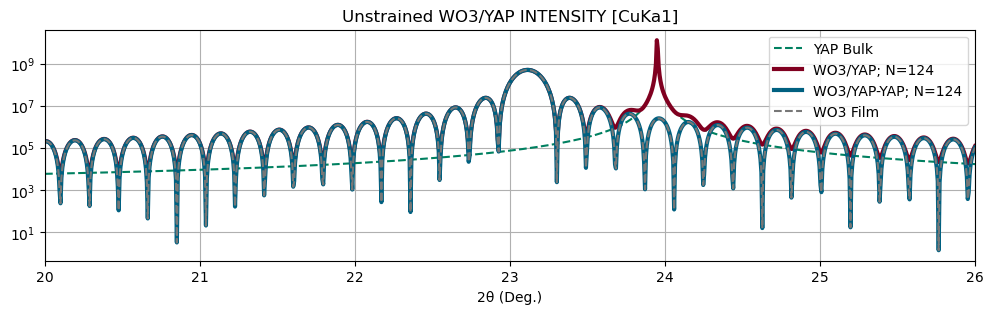

In [38]:
# XRD_KJ = Xray(wavelength = Xray.CuKa1, TTHETA=np.linspace(20, 26, 1024))
TTHETA = XRD_KJ.TTHETA

Q = XRD_KJ.Q(1,0,0)
# L = XRD_KJ.HKL(ngo)[:,2]
GEN_WO3 = lambda N: Film(wo3, (N,1,1))
GEN_WO3YAP = lambda N: Sample(GEN_WO3(N), YAP_Bulk, nref=(1,0,0))
N = 124

plt.figure(figsize=(12,3))
plt.title('Unstrained WO3/YAP INTENSITY [CuKa1]')
# plt.semilogy(TTHETA, WO3_Bulk.I(Q), color='#006080', label=f"WO3 Bulk", linestyle='dashed')

plt.semilogy(TTHETA, YAP_Bulk.I(Q), color='#008060', label=f"YAP Bulk", linestyle='dashed')
plt.semilogy(TTHETA, GEN_WO3YAP(N).I(Q), color='#800020', label=f"WO3/YAP; N={N}", linewidth=3)
plt.semilogy(TTHETA, GEN_WO3YAP(N).I(Q)-YAP_Bulk.I(Q), color='#006080', label=f"WO3/YAP-YAP; N={N}", linewidth=3)
plt.semilogy(TTHETA, GEN_WO3(N).I(Q), color='#777777', label=f"WO3 Film", linestyle='dashed')

plt.grid()
plt.xlabel("2θ (Deg.)")
plt.xlim([20, 26])
plt.legend()

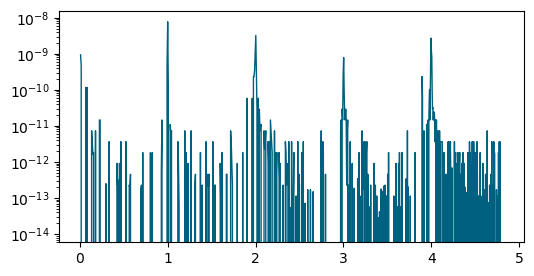

In [39]:
Q = XRD.PQ(1, 1, 0) 
# Q = XRD.pseudoQ(1, 1, 0)
plt.figure(figsize=(6,3))
plt.semilogy(XRD.HKL(yap)[:,0], np.abs(GEN_WO3YAP(N).I(Q)-YAP_Bulk.I(Q)-GEN_WO3(N).I(Q)), linewidth=1, color='#006080')
# plt.semilogy(XRD.HKL(yap)[:,0], np.abs(YAP_Bulk.I(Q)), linewidth=1, color='#008060', linestyle='dashed')

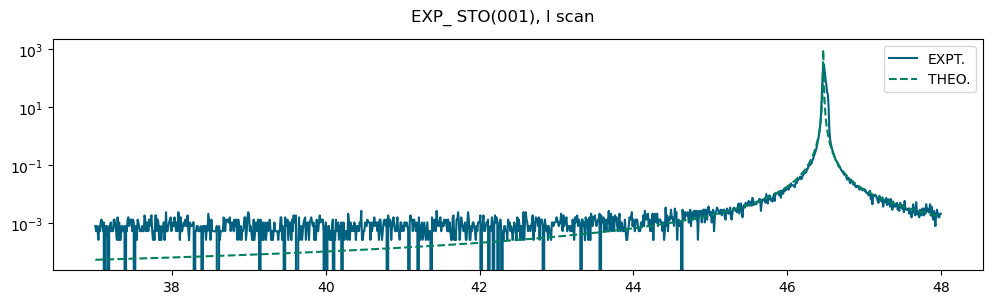

In [40]:
file_path = "./DATA/RAW/STO.json"  # 파일 경로
with open(file_path, "r") as f:
	RAWDATA = json.load(f)
RAWDATA001 = RAWDATA["STO001"]
RAWDATA111 = RAWDATA["STO111"]

plt.figure(figsize=(12,3))
plt.suptitle("EXP_ STO(001), l scan")
# plt.subplot(1,2,1)
expTT = np.arange(37, 48.01, 0.01)
expII = RAWDATA001
plt.semilogy(expTT, expII/np.mean(expII), label='EXPT.', color='#006080')

#
XRD_exp = Xray(wavelength = Xray.CuKa1, TTHETA=expTT)
Q = XRD_exp.Q(0,0,1)
STO_Bulk = Film(sto, (1,1,inf))
plt.semilogy(XRD_exp.TTHETA, STO_Bulk.I(Q)/np.mean(STO_Bulk.I(Q)), color='#008060', linestyle='dashed', label='THEO.')
plt.legend()


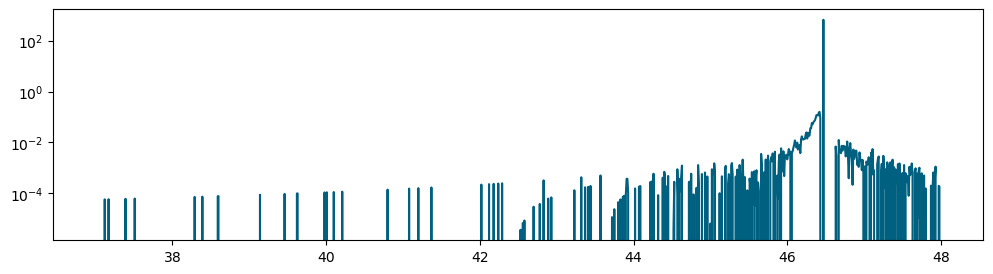

In [41]:
Q = XRD_exp.Q(0,0,1)

plt.figure(figsize=(12,3))
plt.semilogy(expTT, STO_Bulk.I(Q)/np.mean(STO_Bulk.I(Q))-expII/np.mean(expII), label='EXPT.', color='#006080')
